<a href="https://colab.research.google.com/github/falahamro/Moral-Foundations-Analysis/blob/main/Topic_Modeling_on_Republicans_and_Democrats_Election_Campain_Speeches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic Modeling

(-0.5, 2999.5, 1999.5, -0.5)

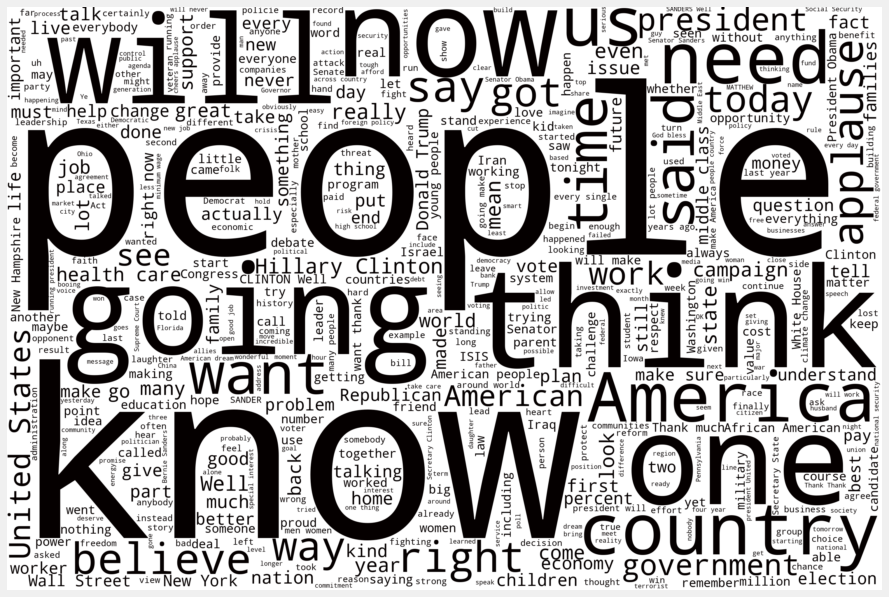

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

wordcloud = WordCloud(
                      background_color="white", width=3000, height=2000, collocations=True,
                      max_words=500, stopwords=STOPWORDS).generate_from_text(' '.join(campaign['text'].values))

# set the word color to black
wordcloud.recolor(color_func = black_color_func)
fig = plt.figure(figsize=[15,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#fig.savefig('./figures/wordcloud.png')

In [ ]:
%%capture
pip install tqdm pyLDAvis gensim numpy bokeh contractions datapane

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working


In [ ]:
# Gensim and LDA
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS
import pyLDAvis
#import pyLDAvis.gensim  # don't skip this

# NLP stuff
import contractions
#import demoji
import string
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk.corpus import stopwords
nltk.download('wordnet')
import spacy

# Plotting tools
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
%matplotlib inline

# Miscellaneous
from sklearn.manifold import TSNE
from pprint import pprint

`scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import base64
import re
from tqdm import tqdm
import numpy as np
import pandas as pd
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 0)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import datapane as dp
dp.login(token="fc1a82ae5cb8f3b17c2f4975c0bd05915ce340e1")

Connected successfully to https://datapane.com as falah.amro@gmail.com


'falah.amro@gmail.com'

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**Topic Modeling Prep**

Data Preprocessing


In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
      yield(gensim.utils.simple_preprocess(str(sentence).encode('utf-8'), deacc=True)) # deacc=True removes punctuations
data_words = list(sent_to_words(campaign['text'].tolist()))
print(data_words[:1])
print("Total docs:", len(data_words))

[['thank', 'you', 'all', 'very', 'much', 'always', 'feel', 'welcome', 'at', 'miami', 'dade', 'college', 'this', 'is', 'place', 'that', 'welcomes', 'everyone', 'with', 'their', 'hearts', 'set', 'on', 'the', 'future', 'place', 'where', 'hope', 'leads', 'to', 'achievement', 'and', 'striving', 'leads', 'to', 'success', 'for', 'all', 'of', 'us', 'it', 'is', 'just', 'the', 'place', 'to', 'be', 'in', 'the', 'campaign', 'that', 'begins', 'today', 'we', 'are', 'months', 'from', 'the', 'time', 'for', 'choosing', 'the', 'stakes', 'for', 'america', 'future', 'are', 'about', 'as', 'great', 'as', 'they', 'come', 'our', 'prosperity', 'and', 'our', 'security', 'are', 'in', 'the', 'balance', 'so', 'is', 'opportunity', 'in', 'this', 'nation', 'where', 'every', 'life', 'matters', 'and', 'everyone', 'has', 'the', 'right', 'to', 'rise', 'already', 'the', 'choice', 'is', 'taking', 'shape', 'the', 'party', 'now', 'in', 'the', 'white', 'house', 'is', 'planning', 'no', 'suspense', 'primary', 'for', 'no', 'chan

In [ ]:
# Build the bigram and trigram models
#Pay attention to the code below and modify as you change text input to tweet 
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=25) # higher threshold fewer phrases. May need to change this to make it appropriate for tweet text length
trigram = gensim.models.Phrases(bigram[data_words], min_count=5, threshold=40)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
data_no_stopwords = remove_stopwords(data_words)
data_bigrams = make_bigrams(data_no_stopwords)
data_preprocessed = make_trigrams(data_bigrams)
print(*data_preprocessed[:20], sep='\n')

['thank', 'much', 'always', 'feel', 'welcome', 'miami', 'dade', 'college', 'place', 'welcomes', 'everyone', 'hearts', 'set', 'future', 'place', 'hope', 'leads', 'achievement', 'striving', 'leads', 'success', 'us', 'place', 'campaign', 'begins', 'today', 'months', 'time', 'choosing', 'stakes', 'america', 'future', 'great', 'come', 'prosperity', 'security', 'balance', 'opportunity', 'nation', 'every', 'life', 'matters', 'everyone', 'right', 'rise', 'already', 'choice', 'taking', 'shape', 'party', 'white_house', 'planning', 'suspense', 'primary', 'change', 'election', 'hold', 'onto', 'power', 'slog', 'agenda', 'another', 'name', 'opponents', 'call', 'action', 'time', 'around', 'got', 'left', 'know', 'america_deserves_better', 'offered', 'progressive', 'agenda', 'includes', 'everything', 'progress', 'responsible', 'slowest', 'economic', 'recovery', 'ever', 'biggest', 'debt', 'increases', 'ever', 'massive', 'tax', 'increase', 'middle_class', 'relentless', 'buildup', 'regulatory', 'state', '

Dictionary & Corpu

In [ ]:
# Create dictionary and corpus needed for topic modeling

# dictionary is a mapping of word_id --> word, as the variable name implies
id2word = corpora.Dictionary(data_preprocessed)
id2word.filter_extremes(no_below=15, no_above=0.4, keep_n=80000)

# the preprocessed and lemmatized documents themselves
texts = data_preprocessed

# corpus is a mapping of word_id --> word frequency
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1])

[[(0, 1), (1, 2), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 3), (9, 1), (10, 1), (11, 2), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 2), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 3), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 4), (48, 4), (49, 1), (50, 1), (51, 1), (52, 1), (53, 2), (54, 2), (55, 1), (56, 2), (57, 3), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 2), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 2), (76, 5), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 2), (83, 1), (84, 2), (85, 1), (86, 1), (87, 2), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 2), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1)

In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('abroad', 1),
  ('accept', 2),
  ('achieve', 1),
  ('achievement', 2),
  ('act', 1),
  ('action', 1),
  ('administration', 1),
  ('adults', 1),
  ('agenda', 3),
  ('ages', 1),
  ('ago', 1),
  ('ahead', 2),
  ('alive', 1),
  ('alliances', 2),
  ('along', 1),
  ('already', 1),
  ('amendment', 1),
  ('among', 1),
  ('anyone', 1),
  ('asking', 1),
  ('attention', 1),
  ('attitude', 1),
  ('automatically', 1),
  ('bad', 1),
  ('balance', 1),
  ('baltimore', 1),
  ('beginning', 1),
  ('begins', 2),
  ('beliefs', 2),
  ('beyond', 1),
  ('biggest', 1),
  ('billion_dollars', 1),
  ('blessed', 1),
  ('bond', 1),
  ('border', 1),
  ('born', 1),
  ('boy', 1),
  ('boys', 1),
  ('brave', 1),
  ('brother', 1),
  ('brought', 3),
  ('bureaucracy', 1),
  ('bureaucrats', 1),
  ('bush', 1),
  ('businesses', 1),
  ('calling', 1),
  ('campaigns', 1),
  ('candidate', 4),
  ('capital', 4),
  ('caring', 1),
  ('case', 1),
  ('causing', 1),
  ('certain', 1),
  ('challenge', 2),
  ('challenges', 2),
  ('chang

**Latent Dirichlet Allocation (LDA)**

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

Model Evaluation Metrics

In [ ]:
from gensim.models import CoherenceModel

# Compute Perplexity (lower is better)
print('Perplexity: ', round(lda_model.log_perplexity(corpus), 2))

# Compute Coherence Score (higher is better)
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_preprocessed, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', round(coherence_lda, 2))

Perplexity:  -7.72
Coherence Score:  0.48


LDA Mallet Model


In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(
   corpus=corpus, id2word=id2word, num_topics=20, random_state=10, 
   update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

In [ ]:
# Show Topics
pprint(lda_model.show_topics(formatted=False)[:3])

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=lda_model, texts=data_preprocessed, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()

print('Coherence Score: ', round(coherence_ldamallet, 2))

[(3,
  [('homes', 0.00027196098),
   ('ready', 0.00027196098),
   ('faith', 0.00027196095),
   ('administration', 0.00027196095),
   ('challenges', 0.00027196095),
   ('costs', 0.00027196095),
   ('security', 0.00027196092),
   ('school', 0.00027196092),
   ('patients', 0.00027196092),
   ('experience', 0.00027196092)]),
 (0,
  [('rose', 0.00027196147),
   ('troops', 0.00027196103),
   ('administration', 0.000271961),
   ('tax', 0.00027196098),
   ('challenges', 0.00027196095),
   ('problem', 0.00027196095),
   ('security', 0.00027196095),
   ('infrastructure', 0.00027196092),
   ('begin', 0.00027196092),
   ('often', 0.00027196092)]),
 (2,
  [('tonight', 0.00027196098),
   ('applause', 0.00027196098),
   ('troops', 0.00027196095),
   ('iowa', 0.00027196092),
   ('ready', 0.00027196092),
   ('students', 0.00027196092),
   ('homes', 0.00027196092),
   ('challenges', 0.00027196092),
   ('leave', 0.00027196092),
   ('military', 0.00027196092)])]
Coherence Score:  0.35


Find most optimal number of topics


In [ ]:
from gensim import corpora
from gensim import models
from gensim.models import LdaModel
from gensim.models import TfidfModel
from gensim.models import CoherenceModel

In [ ]:
from gensim.models.wrappers import LdaMallet

**TOPIC MODELING: A new Approach**

In [ ]:
import re
import nltk
import string
import pyLDAvis
from pprint import pprint
from tqdm.notebook import tqdm
import pandas as pd
import matplotlib.pyplot as plt
#from bertopic import BERTopic
import pyLDAvis.gensim_models as gensimvis
from gensim.models.ldamodel import LdaModel, CoherenceModel
from gensim.corpora import Dictionary
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore" , category=DeprecationWarning)
pyLDAvis.enable_notebook()
tqdm.pandas()
plt.style.use("ggplot")

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 0 to 7482
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Candidate             430 non-null    object        
 1   Party                 430 non-null    object        
 2   Type                  430 non-null    object        
 3   Date                  430 non-null    object        
 4   Title                 430 non-null    object        
 5   Text                  430 non-null    object        
 6   clean_text            430 non-null    object        
 7   words                 430 non-null    object        
 8   sentences             430 non-null    object        
 9   char_count            430 non-null    int64         
 10  word_count            430 non-null    int64         
 11  sentence_count        430 non-null    int64         
 12  avg_word_length       430 non-null    float64       
 13  avg_sentence_length

In [ ]:
campaign = campaign.astype({"Title": str})

In [ ]:
campaign["clean_text"] = campaign["Title"]

In [ ]:
#campaign.head()

In [ ]:
campaign['Title'][0]

'Remarks Announcing Candidacy for President at Miami Dade College in Miami, Florida'

In [ ]:
campaign['clean_text'][0]

'Remarks Announcing Candidacy for President at Miami Dade College in Miami, Florida'

Wordcloud

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 12).generate(' '.join(topic for topic in campaign['clean_text']))

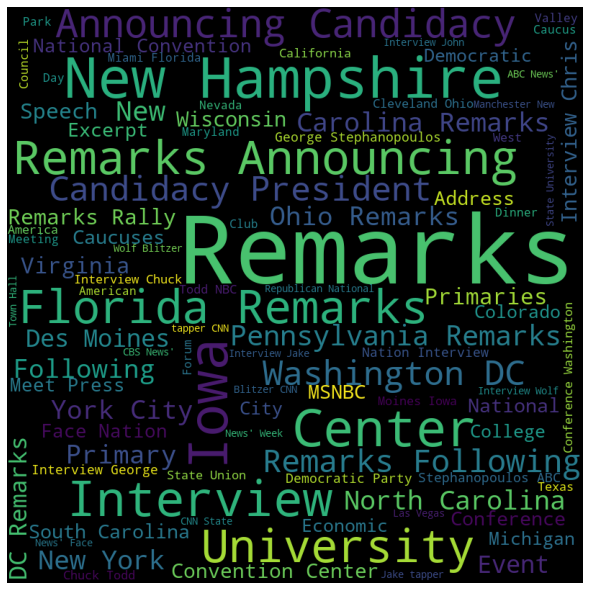

In [ ]:
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

based on the wordcloud shown above we can extend our stopwords list to include some other words.



In [ ]:
stopwords.extend(['New', 'Remarks', 'Announcing', 'Center', 'Primary', 'Interview', 'Washington DC', 
                  'Conference', 'Candidacy', 'President'])

Text preprocessing

In [ ]:
def tokenize(text_string):
  return word_tokenize(text_string)

def remove_punct(text):
    text  = [''.join(filter( lambda x: x in 'abcdefghijklmnopqrstuvwxyz', word.lower()))
             for word in text]
    return text

def remove_stopwords(text):
    text = [word for word in text if word not in stopwords]
    return text


def stemming(text):
    stemm = nltk.PorterStemmer()
    text = [stemm.stem(word) for word in text]
    return text


def lemmatizer(text):
    lemm = nltk.WordNetLemmatizer()
    text = [lemm.lemmatize(word) for word in text]
    return text

def clean_text(text):
  text = tokenize(text)
  text = remove_punct(text)
  # text = stemming(text)
  text = remove_stopwords(text)

  return text

In [ ]:
cleaned_text_data = [ x for x in campaign['Text'].progress_apply(clean_text)]

  0%|          | 0/430 [00:00<?, ?it/s]

LDA

At first, We create a Bag of Words (BOW) dictionary from the cleaned and processed docs containing the number of times a word appears in the training set.


In [ ]:
id2word = Dictionary(cleaned_text_data)
corpus = [id2word.doc2bow(text) for text in cleaned_text_data]

In [ ]:
len(corpus)

430

In [ ]:
#explore some terms generated from bow
[(id2word[id], freq) for id, freq in corpus[0]][:20]

[('', 177),
 ('abroad', 1),
 ('accept', 2),
 ('achieve', 1),
 ('achievement', 2),
 ('across', 1),
 ('act', 1),
 ('action', 1),
 ('administration', 1),
 ('adults', 1),
 ('againafter', 1),
 ('againwe', 1),
 ('agenda', 3),
 ('ages', 1),
 ('ago', 2),
 ('ahead', 2),
 ('alive', 1),
 ('alli', 1),
 ('alliances', 2),
 ('allwhat', 1)]

Baseline LDA model

In [ ]:
#We build the baseline lda model with number of topic = 20
num_topics = 20
lda_model = LdaModel(corpus=corpus,
                     id2word=id2word,
                     num_topics=num_topics)

In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.176*"" + 0.009*"nt" + 0.006*"people" + 0.005*"country" + 0.005*"going" + '
  '0.005*"president" + 0.005*"want" + 0.005*"one" + 0.004*"america" + '
  '0.004*"us"'),
 (1,
  '0.011*"" + 0.001*"nt" + 0.001*"america" + 0.001*"must" + 0.001*"american" + '
  '0.001*"us" + 0.000*"united" + 0.000*"security" + 0.000*"people" + '
  '0.000*"president"'),
 (2,
  '0.172*"" + 0.007*"nt" + 0.007*"people" + 0.005*"know" + 0.005*"country" + '
  '0.005*"president" + 0.005*"going" + 0.005*"make" + 0.004*"want" + '
  '0.004*"one"'),
 (3,
  '0.026*"" + 0.002*"people" + 0.002*"nt" + 0.002*"country" + '
  '0.002*"president" + 0.001*"need" + 0.001*"know" + 0.001*"american" + '
  '0.001*"america" + 0.001*"us"'),
 (4,
  '0.191*"" + 0.009*"nt" + 0.009*"people" + 0.006*"know" + 0.006*"going" + '
  '0.006*"country" + 0.005*"us" + 0.005*"one" + 0.005*"think" + '
  '0.005*"clinton"'),
 (5,
  '0.084*"" + 0.004*"people" + 0.004*"nt" + 0.003*"country" + 0.003*"need" + '
  '0.003*"us" + 0.003*"president" + 0.00

Get model with optimum number of topics

In [ ]:
def find_optim_num_topic(dictionary , corpus , text , max=29 , start = 5 , step = 2):
    
    max_cohernce = 0
    best_model = 0
    coherence_values = []
    optim_num_topics = 0
    for num_topics in tqdm(range(start , max , step)):
        model =  LdaModel(corpus=corpus,
                          id2word=id2word,
                          num_topics=num_topics,
                          update_every=1)
        

        coherencemodel = CoherenceModel(model=model , 
                                        texts=text , 
                                        dictionary=dictionary , 
                                        coherence='c_v')
        
        coherence_value = coherencemodel.get_coherence()
        if coherence_value > max_cohernce:
          max_cohernce = coherence_value
          best_model = model
          optim_num_topics = num_topics

        coherencemodel = CoherenceModel(model=model , texts=text , dictionary=dictionary , coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        print(f"With num_topics={num_topics}, The coherence_value={coherence_value}")
    print(f"Return best model with num_topics={optim_num_topics} and max coherence_value={max_cohernce:.2f}")
    return best_model , coherence_values

In [ ]:
best_model, coherence_values = find_optim_num_topic(dictionary=id2word , corpus=corpus , text=cleaned_text_data)

  0%|          | 0/12 [00:00<?, ?it/s]

With num_topics=5, The coherence_value=0.25312436954710577
With num_topics=7, The coherence_value=0.25435630459463726
With num_topics=9, The coherence_value=0.25581693509631964
With num_topics=11, The coherence_value=0.24912143557367517
With num_topics=13, The coherence_value=0.25392845843261336
With num_topics=15, The coherence_value=0.24835860712964872
With num_topics=17, The coherence_value=0.2474582396658593
With num_topics=19, The coherence_value=0.2541532105054119
With num_topics=21, The coherence_value=0.2519235974709359
With num_topics=23, The coherence_value=0.2490083230620889
With num_topics=25, The coherence_value=0.2481468708811925
With num_topics=27, The coherence_value=0.2511376352622215
Return best model with num_topics=9 and max coherence_value=0.26


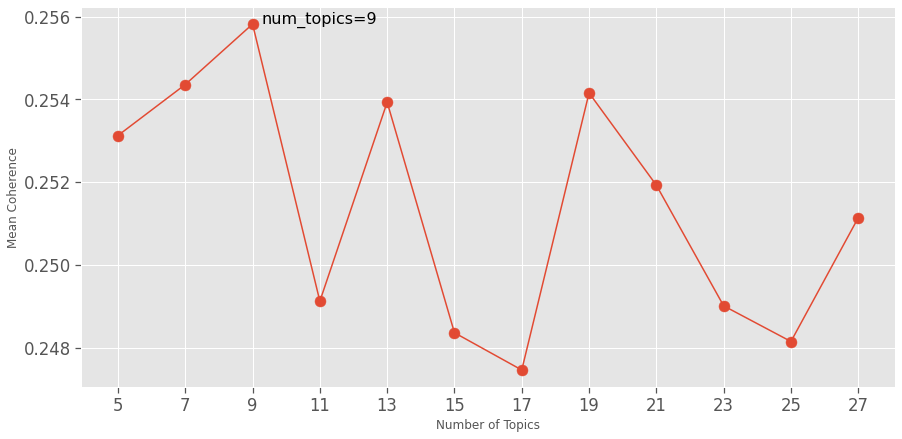

In [ ]:
fig = plt.figure(figsize=(13,7))
# create the line plot
k_values = range(5 , 29 , 2)
ax = plt.plot( k_values, coherence_values )
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
# add the points
plt.scatter( k_values, coherence_values, s=120)
# find and annotate the maximum point on the plot
ymax = max(coherence_values)
xpos = coherence_values.index(ymax)
best_k = k_values[xpos]
plt.annotate( "num_topics=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
# show the plot
plt.show()

Visulize the model


In [ ]:
LDAvis= gensimvis.prepare(best_model, corpus, id2word)

In [ ]:
LDAvis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.102742  0.003551  1       1        68.941970
5      0.090494  0.001197  2       1        20.660311
7      0.073575 -0.006166  3       1        10.035431
4      0.033283 -0.001087  4       1        0.332536 
8      0.014849  0.002310  5       1        0.005952 
2     -0.027919  0.004643  6       1        0.005951 
1     -0.043980 -0.005102  7       1        0.005950 
0     -0.096554 -0.000333  8       1        0.005950 
6     -0.146491  0.000986  9       1        0.005949 , topic_info=          Term           Freq          Total Category  logprob  loglift
0               177615.000000  177615.000000  Default  30.0000  30.0000
456  nt         6483.000000    6483.000000    Default  29.0000  29.0000
492  people     7141.000000    7141.000000    Default  28.0000  28.0000
273  going      5711.000000    5711.000000    Default  27.0000  27.0000
357  know       5460.000000    5460.000000    Default  26.0000  26.0000
..    ...               ...            ...        ...      ...      ...
357  know       0.043886       5460.804844    Topic9  -6.9978  -2.0018 
678  think      0.038562       3592.520533    Topic9  -7.1271  -1.7124 
436  need       0.033310       2434.257570    Topic9  -7.2735  -1.4696 
582  said       0.032206       2492.454403    Topic9  -7.3072  -1.5270 
514  president  0.032627       3369.150412    Topic9  -7.2942  -1.8154 

[749 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
0      1      0.719144       
0      2      0.196830       
0      3      0.081677       
0      4      0.002252       
0      5      0.000034       
...   ..           ... ..    
760    1      0.664097  young
760    2      0.197555  young
760    3      0.133936  young
760    4      0.003348  young
19757  1      0.787169  yup  

[758 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 8, 5, 9, 3, 2, 1, 7])

Map docoments to topics

In [ ]:
campaign['lda_topic'] = [best_model.get_document_topics(x)[0][0] for x in tqdm(corpus)]

  0%|          | 0/430 [00:00<?, ?it/s]

In [ ]:
#campaign.head(1)

Count of dataset Documents in each topic

Text(0.5, 1.0, 'Number of documents per topic in the data')

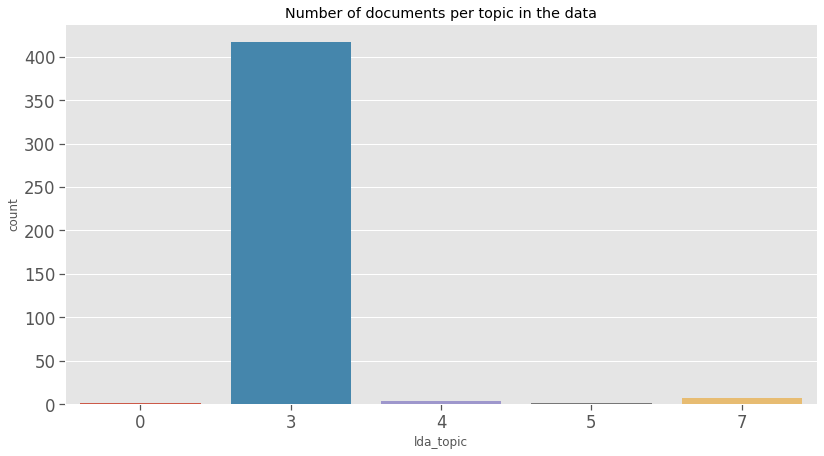

In [ ]:
plt.figure(figsize=(12, 7))
import seaborn as sns
sns.countplot(campaign['lda_topic'])
plt.title("Number of documents per topic in the data")

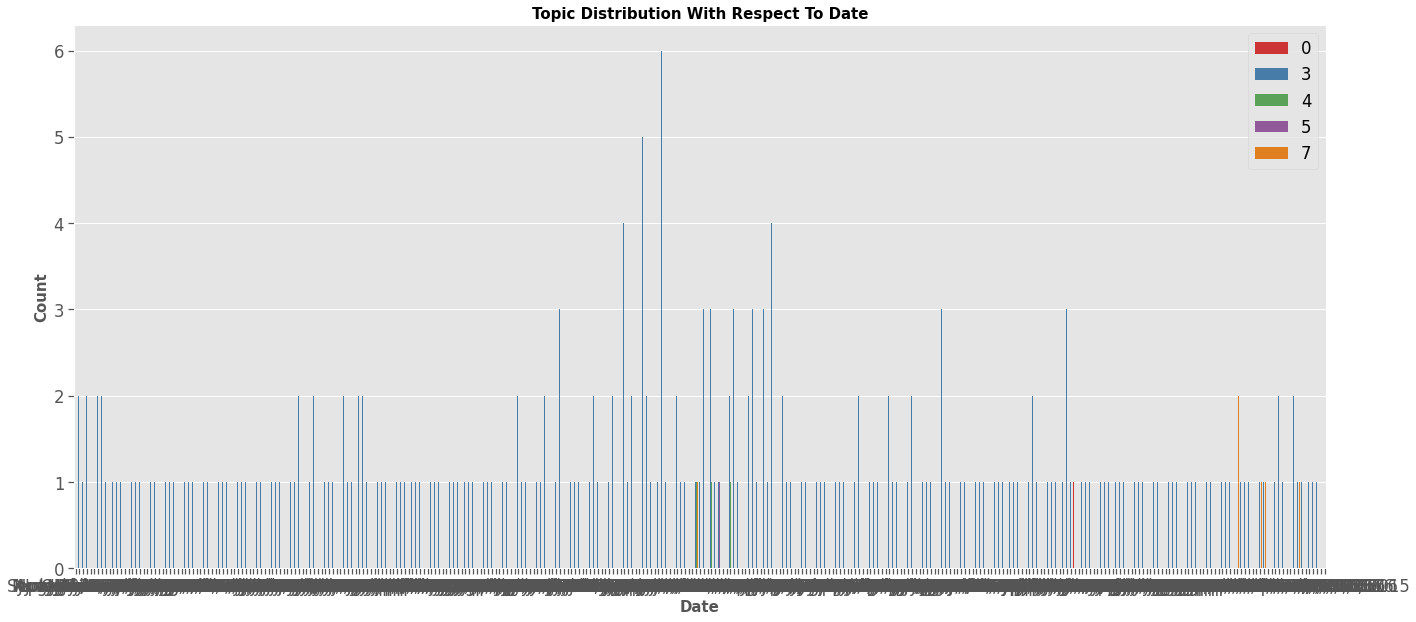

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(campaign['Date'], hue=campaign['lda_topic'], palette = 'Set1',)
plt.legend(loc='upper right')
plt.ylabel('Count', fontsize=15, fontweight='bold')
plt.xlabel('Date', fontsize=15, fontweight='bold')
plt.title('Topic Distribution With Respect To Date', fontsize=15, fontweight='bold')
plt.show()

In [ ]:
pd.set_option('display.max_colwidth', 30)

In [ ]:
campaign.head()

,Candidate,Party,Type,Date,Title,Text,clean_text,words,sentences,char_count,word_count,sentence_count,avg_word_length,avg_sentence_length,datetime,clean_speech,total_words,authority/subversion,care/harm,fairness/cheating,liberty/oppression,loyalty/betrayal,sanctity/degradation,Cluster,text,Subjectivity,Polarity,Analysis,Positive,Negative,Neutral,total_len,Final_Sentiment,lda_topic
0,Jeb Bush,1,1,"June 15, 2015",Remarks Announcing Candida...,Thank you all very much. I...,Remarks Announcing Candida...,"[thank, you, all, very, mu...","[thank you all very much.,...",12383,2338,47,5.296407,49.744681,2015-06-15,"[thank, you, all, very, mu...",2284,0.175131,0.175131,0.131349,0.000000,0.306480,0.175131,0,Thank you all very much. I...,0.456340,0.171087,1,0,0,0,12383,0.0,3
1,Jeb Bush,1,1,"July 30, 2015",Remarks to the National Ur...,Thank you all very much. I...,Remarks to the National Ur...,"[thank, you, all, very, mu...","[thank you all very much.,...",14457,2868,126,5.040795,22.761905,2015-07-30,"[thank, you, all, very, mu...",2638,0.303260,0.075815,0.265353,0.000000,0.151630,0.341168,0,Thank you all very much. I...,0.449360,0.171919,1,0,0,0,14457,0.0,3
2,Jeb Bush,1,1,"August 11, 2015",Remarks at the Ronald Reag...,Thank you very much. It's ...,Remarks at the Ronald Reag...,"[thank, you, very, much, ....","[thank you very much., it'...",21283,4061,132,5.240827,30.765152,2015-08-11,"[thank, you, very, much, i...",3735,0.321285,0.133869,0.026774,0.000000,0.107095,0.133869,0,Thank you very much. It's ...,0.490971,0.082839,1,0,0,0,21283,0.0,3
3,Jeb Bush,1,1,"September 9, 2015","Remarks in Garner, North C...",Thank you very much. I app...,"Remarks in Garner, North C...","[thank, you, very, much, ....","[thank you very much., i a...",10049,2030,92,4.950246,22.065217,2015-09-09,"[thank, you, very, much, i...",1880,0.159574,0.053191,0.053191,0.000000,0.053191,0.212766,0,Thank you very much. I app...,0.473084,0.138774,1,0,0,0,10049,0.0,3
4,Jeb Bush,1,1,"November 2, 2015","Remarks in Tampa, Florida",Thank you. It's great to b...,"Remarks in Tampa, Florida","[thank, you, ., it, 's, gr...","[thank you., it's great to...",14189,2564,37,5.533931,69.297297,2015-11-02,"[thank, you, it, s, great,...",2550,0.313725,0.117647,0.039216,0.039216,0.000000,0.274510,0,Thank you. It's great to b...,0.470839,0.177264,1,0,0,0,14189,0.0,3
